In [1]:
import matplotlib.pyplot as plt  
import numpy as np   
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

from datetime import date, timedelta
import time

import urllib.request
import json

from scipy.optimize import curve_fit

In [2]:
# gerar o pdf?
GERAR_PDF = False

##Formatação geral dos gráficos
sns.set(font='Franklin Gothic Book', rc={'axes.axisbelow': False,
                                         'axes.edgecolor': 'lightgrey',
                                         'axes.facecolor': 'None',
                                         'axes.spines.right': False,
                                         'axes.spines.top': False,
                                         'figure.facecolor': 'white',
                                         'xtick.bottom': False})

# Dados

In [41]:
df = pd.read_excel("Araraquara_covid.xlsx")
df

dia       data  confirmados  novos  mortes  total internações  \
0      0 2020-03-31          3.0    3.0     1.0                NaN   
1      1 2020-04-01          5.0    2.0     1.0                NaN   
2      2 2020-04-02          7.0    2.0     1.0                NaN   
3      3 2020-04-03          7.0    0.0     1.0                NaN   
4      4 2020-04-04          7.0    0.0     1.0                NaN   
..   ...        ...          ...    ...     ...                ...   
514  514 2021-08-27          NaN    NaN     NaN                NaN   
515  515 2021-08-28          NaN    NaN     NaN                NaN   
516  516 2021-08-29          NaN    NaN     NaN                NaN   
517  517 2021-08-30          NaN    NaN     NaN                NaN   
518  518 2021-08-31          NaN    NaN     NaN                NaN   

     internações confirmadas  UTI (total)  1a dose  2a dose  dose unica  \
0                        NaN          NaN      NaN      NaN         NaN   
1                        NaN          NaN      NaN      NaN         NaN   
2                        NaN          NaN      NaN      NaN         NaN   
3                        NaN          NaN      NaN      NaN         NaN   
4                        NaN          NaN      NaN      NaN         NaN   
..                       ...          ...      ...      ...         ...   
514                      NaN          NaN      NaN      NaN         NaN   
515                      NaN          NaN      NaN      NaN         NaN   
516                      NaN          NaN      NaN      NaN         NaN   
517                      NaN          NaN      NaN      NaN         NaN   
518                      NaN          NaN      NaN      NaN         NaN   

     total vac  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
514        NaN  
515        NaN  
516        NaN  
517        NaN  
518        NaN  

[519 rows x 12 columns]

In [4]:
c = {"Brazil": 23, "New Zealand": 122}

# formata inteiros e listas
def formata(x):
    if (type(x)== int or type(x)== float):
        return format(x,',d').replace(",",".")
    if (type(x) == list):
        aux = []
        for elemento in x:
            aux.append(format(elemento,',d').replace(",","."))
        
        return aux
# para substituir / por - na data   
def substitui(string, s_old, s_new):
    aux = ""
    for i, s in enumerate(string):
        if (s == s_old):
            aux += s_new
        else:
            aux += string[i]
    return aux
            
    

def extract_data_API(resultado, countries_index):
    data_countries = []
    
    data_global = resultado["Global"]["TotalConfirmed"]
    data_global2 = resultado["Global"]["TotalDeaths"]
    
    global_data = [data_global, data_global2]

    for i in countries_index:
        data_country = resultado["Countries"][i]["TotalConfirmed"]
        data_country2 = resultado["Countries"][i]["TotalDeaths"]
        
        data_countries.append([data_country, data_country2])
    
    return global_data, data_countries[0]

def extract_data_df(df):
    n_confirmados = int(df['confirmados'].max())
    n_mortes = int(df["mortes"].max())
    
    return n_confirmados, n_mortes



In [5]:
if (True):
    url = 'https://api.covid19api.com/summary'
    resposta = urllib.request.urlopen(url)
    resultado = json.loads(resposta.read())

In [6]:
data_global, data_countries = extract_data_API(resultado, countries_index = [c["Brazil"]])

casos_aqa, mortes_aqa = extract_data_df(df)

pop_mundo, pop_br, pop_sp, pop_aqa = 7.8e9, 209.5e6, 44.04e6, 238e3

fig = go.Figure(go.Table(
        header = dict(values = ['Região', 'Confirmados', 'Confirmados / 100k hab.' ,'Óbitos', 'Letalidade (%)'],
                                line_color='black',
                                 fill_color='royalblue',
                                  align="center",
                                 font_color = "black"),

        cells = dict(values = [["Mundo", "Brasil", "Estado SP","Araraquara"],
                               [formata(data_global[0]), formata(data_countries[0]), "-", formata(casos_aqa)],
                               [formata(int(data_global[0]*1e5/pop_mundo)), formata(int(data_countries[0]*1e5/pop_br)), "-", formata(int(casos_aqa*1e5/pop_aqa))],
                               [formata(data_global[1]), formata(data_countries[1]), "-",  formata(mortes_aqa)],
                               [str(round(100*data_global[1]/data_global[0], 2)).replace(".", ","), str(round(100*data_countries[1]/data_countries[0], 2)).replace(".",","), "-" , str(round(100*mortes_aqa/casos_aqa, 2)).replace(".",",")]],
                                line_color='black',
                                 fill_color='white',
                                font_color = "black")   
    ))
fig.update_layout(width= 700, height=390)
fig.show()
fig.write_image("tabela.png", scale=3 )

# Gráficos 

### definições

In [7]:
casos_atual = df['confirmados'].max()
pos = [i for i, x in enumerate(df['confirmados']) if x == casos_atual][0]
data_atual = date.today().strftime("%d/%m/%Y")
print(data_atual)
dia_sem = date.today().weekday()
print("dia.", dia_sem)

# adaptar os meses de acordo com o valor retornado de data_atual!!!!!
#meses = [ 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.','Jan']# 'Fev', "Março"]
#dias_meses = [30, 31, 30, 31, 31, 30, 31, 30, 31, 31]#, 28, 31] # abril-marco
#linhas = [30, 61, 91, 122, 153, 183, 214, 244, 275, 306, 334, 365]
#pos_ticks = [15, 46, 76, 107, 138, 168, 199, 229, 260] # 291, 319, 350]

def make_month_arrays(data_atual, return_all):
    # meses e dias até o final de 2021
    meses = [ 'Mar.','Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
             'Jan.', 'Fev.','Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.']
    dias_meses = [1, 30, 31, 30, 31, 31, 30, 31, 30, 31, 
                  31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    n_mes = int(data_atual[3:5])
    
    if (not return_all):
        # pegamos só o que estamos interessados
        meses = meses[0:10+n_mes]
        dias_meses = dias_meses[0:10+n_mes]

    # fazer linhas e pos_ticks
    linhas, pos_ticks = [], []
    k, j = 0, 0
    for i, v in enumerate(dias_meses):
        linhas.append(v+k)
        k += v
        if (i == 0):
            pass
        if (i == 1):
            pos_ticks.append(v/2)
            j = v/2
        else:
            pos_ticks.append(j)
        j += v    

    
    
    
    return meses, dias_meses, linhas[1:], pos_ticks[1:]  

meses, dias_meses, linhas, pos_ticks = make_month_arrays(data_atual, False)

print(meses, dias_meses, linhas, pos_ticks)

03/08/2021
dia. 1
['Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.'] [1, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31] [31, 62, 92, 123, 154, 184, 215, 245, 276, 307, 335, 366, 396, 427, 457, 488, 519] [15.0, 45.0, 76.0, 106.0, 137.0, 168.0, 198.0, 229.0, 259.0, 290.0, 321.0, 349.0, 380.0, 410.0, 441.0, 471.0, 502.0]


### funções de agrupamento

In [8]:
# variação de um dado array
def variacao(array):
    aux = []
    for i, elem in enumerate(array):
        if (i == 0):
            aux.append(elem)
        else:
            valor = array[i] - array[i-1]
            aux.append(valor)
    return np.array(aux)

# agrupa por mes o tipo de variacao (mortes/confirmados) desejado.
# TEM UM PROBLEMA DE NOV PARA DEZ: VER O QUE ESTA ACONTECENDO NESSA TRANSICAO 
def agroup_month(df, dias_meses, variacao_vec):
    array = []
    k = 0
    #array.append(variacao_vec[0])
    
    for duracao_mes in dias_meses:
        acum = 0
        for i in range(k, duracao_mes + k):
            if (np.isnan(variacao_vec[i])):
                break
            acum += variacao_vec[i]
        array.append(acum)
        k += duracao_mes
        
    return array

# agrupa por semana o tipo de variacao (mortes/confirmados) desejado.
# retorna se é sabado (verificar se esta correta(não verifiquei se deu o resultado esperado))
# EXCLUIR ESSE BOOL DE SABADO 
def agroup_week(df, variacao_vec):
    array = []
    k = 5
    array.append(variacao_vec[0:k].sum())
    stay = True
    sabado = False
    
    while(stay):
        acum = 0
        j = 0
        for i in range(k, k+7):
            if (np.isnan(variacao_vec[i])):
                stay = False
                break
            acum += variacao_vec[i]
            j += 1
        array.append(acum)
        k += 7
    if (j == 7):
        sabado = True
        
    return array, sabado


### outras funções

In [9]:
def assinatura(x1, x2, y):
    plt.text(x1, y, 'Compilado por Daniel H.', fontsize=10)
    plt.text(x2, y, 'Fonte: Boletins da Prefeitura', fontsize=10)
    
def text_data(string_info, df):
    plt.text(pos+1, 
              df[string_info][pos]-3, 
              int(df[string_info][pos]), 
              fontsize=15, 
              color= 'lightgrey')

# retorna a média de novos casos dos ultimos n dias
def media_last_n(n, i, lista_novos):
    soma = 0
    # caso o indice seja menor que n
    if (i < n):
        for j in range (0, i+1):
            soma += lista_novos[j]

        return soma/(i+1)
    # para i > n
    else:
        for j in range(i-6, i+1):
            soma += lista_novos[j]
            
        return soma/n 

def media_movel(dias, lista_novos):
    aux = []
    #deve parar em pos.
    for i in range(pos+1):
        aux.append( media_last_n(dias, i, lista_novos) )
    
    return np.array(aux)
    
def linhas_veticais(array_linhas, n):
    for i in range(n):
        plt.axvline(array_linhas[i]+1-0.5, ls="--", alpha=0.5, color = "whitesmoke")

# faz cores nos plots de barra. retorna array
def make_colors(var, cor1, cor2):
    colors = []
    for i in range(var-1):
        colors.append(cor1)
    colors.append(cor2)
    
    return colors

        

# Gráficos

disclaimers:
    * fonte: Boletins da Prefeitura de Araraquara
    * Os dias são contados a partir do dia em que ocorreu o primeiro caso confirmado: 31/03
    * A média móvel é de 7 dias
    * A semana epidemiológica foi definida de domingo à sábado.
    * Os dados do mundo e Brasil são do dia anterior.
    
Informações importantes:
    * média movel atual
    * numero de casos esssa semana (% menor/maior que a semana passada)
    * numero de mortes esta semana
    

## 1. Séries temporais 

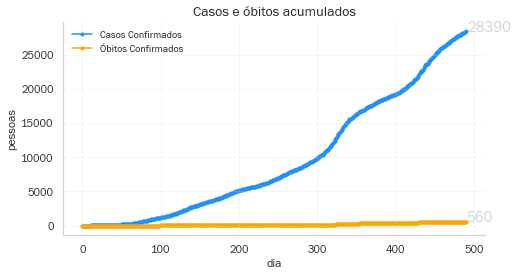

In [10]:
plt.figure(figsize=(7,4))

plt.plot(df['dia'], df['confirmados'],  '.', linestyle='-', color='dodgerblue', label='Casos Confirmados')
plt.plot(df['dia'], df['mortes'],       '.', linestyle='-', color='orange', label='Óbitos Confirmados')
plt.grid(alpha=0.2, color='lightgrey')

plt.title('Casos e óbitos acumulados', size='14')
plt.xlabel('dia', fontsize=12)
plt.ylabel('pessoas', fontsize=12)
plt.legend(fontsize=10, frameon=False)
plt.tight_layout()

text_data("mortes", df)
text_data("confirmados", df)

plt.savefig('casos_obitos_acumulados.png',bbox_inches='tight', dpi = 150)

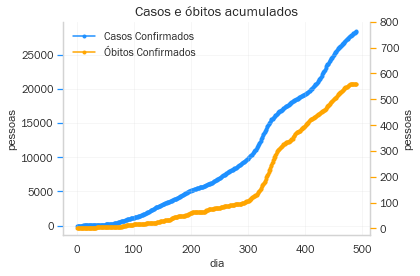

In [11]:
sns.set(font='Franklin Gothic Book', rc={'axes.axisbelow': False,
                                         'axes.edgecolor': 'lightgrey',
                                         'axes.facecolor': 'None',
                                         'axes.spines.right': True,
                                         'axes.spines.top': False,
                                         'figure.facecolor': 'white',
                                         'xtick.bottom': False})

fig, ax = plt.subplots()

line, = ax.plot(df['dia'], df['confirmados'],  '.', linestyle='-', color='dodgerblue', label='Casos Confirmados')
ax.set_title('Casos e óbitos acumulados', size='14')
ax.set_xlabel('dia', fontsize=12)
ax.set_ylabel('pessoas', fontsize=12)
ax.grid(alpha=0.2, color='lightgrey')
#ax.grid(False)
ax.tick_params(color = "dodgerblue")

#text_data("confirmados", df)

ax2 = ax.twinx()

line2, = ax2.plot(df['dia'], df['mortes'],       '.', linestyle='-', color='orange', label='Óbitos Confirmados')
ax2.set_ylabel("pessoas")
#ax2.grid(alpha=0.2, color='lightgrey')
ax2.grid(False)
ax2.set_ylim(top=800)
ax2.tick_params(color = "orange")

ax.legend((line, line2), ('Casos Confirmados', 'Óbitos Confirmados'), frameon=False)

plt.tight_layout()

#text_data("mortes", df)

plt.savefig('casos_obitos_acumulados2.png',bbox_inches='tight', dpi = 150)

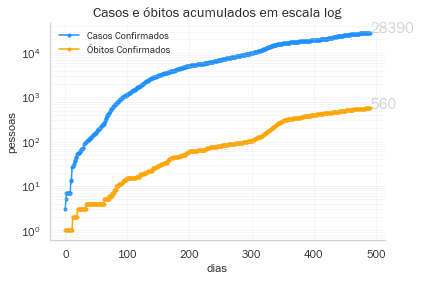

In [12]:
sns.set(font='Franklin Gothic Book', rc={'axes.axisbelow': False,
                                         'axes.edgecolor': 'lightgrey',
                                         'axes.facecolor': 'None',
                                         'axes.spines.right': False,
                                         'axes.spines.top': False,
                                         'figure.facecolor': 'white',
                                         'xtick.bottom': False})

plt.semilogy(df['dia'], df['confirmados'],  '.', linestyle='-', color='dodgerblue', label='Casos Confirmados')
plt.semilogy(df['dia'], df['mortes'],       '.', linestyle='-', color='orange', label='Óbitos Confirmados')

plt.grid(alpha=0.2, color='lightgrey', which="both")
plt.title('Casos e óbitos acumulados em escala log', size=14)
plt.xlabel('dias', fontsize=12)
plt.ylabel('pessoas', fontsize=12)
#plt.ylabel('log(Casos confirmados)', fontsize=12)
plt.legend(fontsize=10, frameon=False)

text_data("mortes", df)
text_data("confirmados", df)

plt.savefig('casos_obitos_log_acumulados.png',bbox_inches='tight', dpi = 150)

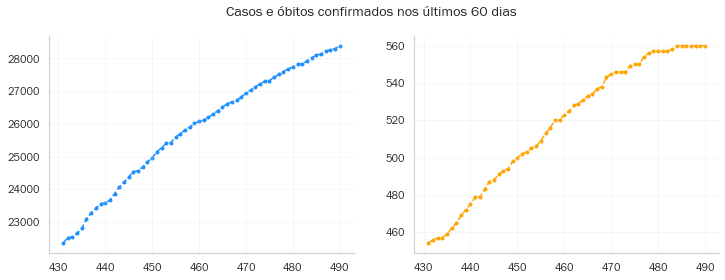

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey = False)

n = 60
mask = df["dia"] > pos - n

plt.suptitle(f"Casos e óbitos confirmados nos últimos {n} dias ")

ax1.plot(df["dia"][mask], df["confirmados"][mask], ".",ls = "--", color = "dodgerblue")
ax2.plot(df["dia"][mask], df["mortes"][mask], ".",ls = "--", color = "orange")

ax1.grid(color = "lightgray", alpha = 0.2)
ax2.grid(color = "lightgray", alpha = 0.2)


## 2. Novos casos

média móvel hoje: 68.14285714285714


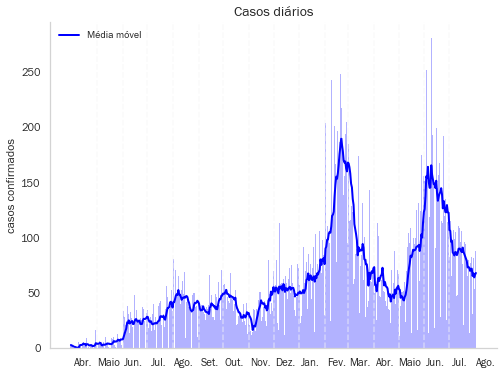

In [14]:
x = variacao(df["confirmados"])
y = np.arange(len(x))
plt.figure(figsize=(8,6))

linhas_veticais(linhas, 15)
plt.bar(y, x, alpha=0.3, width = 1, color="blue", linewidth = 0)
plt.xticks(pos_ticks, meses[1:])
plt.ylabel("casos confirmados", fontsize= 12)

mv = media_movel(7, x)
dia = np.arange(len(mv))
plt.plot(dia, mv, linestyle='-', linewidth = 2, alpha = 1 , color='blue', label = "Média móvel")

plt.legend(fontsize=10, frameon=False)
plt.grid(False)


plt.title('Casos diários', size='14')
print(f"média móvel hoje: {mv[-1]}")

plt.savefig('casos_diarios.png',bbox_inches='tight', dpi = 300)

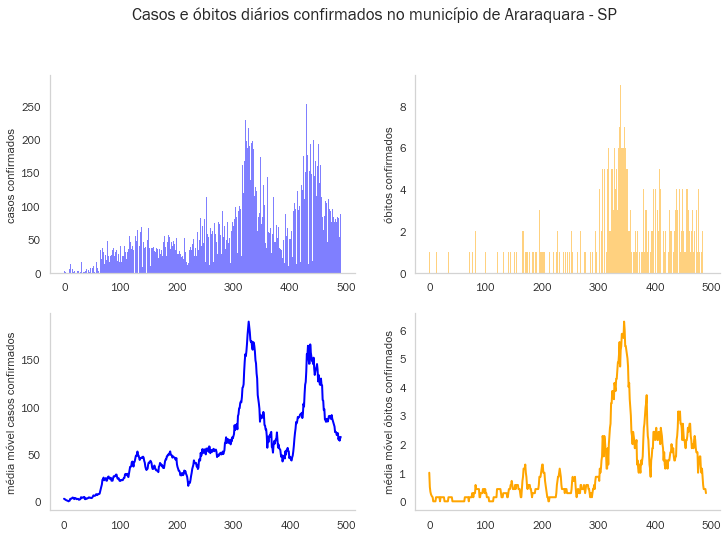

In [15]:
fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(2, 2, figsize=(12,8), sharey = False)

ax1.bar(y, x, alpha=0.5, width = 1, color="blue", linewidth = 0)
ax1.set_ylabel("casos confirmados", fontsize= 12)
ax1.grid(False)

mortes_day = variacao(df["mortes"])
ax2.bar(y, mortes_day, alpha=0.5, width = 1, color="orange", linewidth = 0)
ax2.set_ylabel("óbitos confirmados", fontsize= 12)
ax2.grid(False)

ax3.plot(dia, mv, linestyle='-', linewidth = 2, alpha = 1 , color='blue', label = "Média móvel Casos")
ax3.grid(False)
ax3.set_ylabel("média móvel casos confirmados", fontsize= 12)


mv_mortes = media_movel(7, mortes_day)
ax4.plot(dia, mv_mortes, linestyle='-', linewidth = 2, alpha = 1 , color='Orange', label = "Média móvel Óbitos")
ax4.grid(False)
ax4.set_ylabel("média móvel óbitos confirmados", fontsize= 12)               


plt.suptitle("Casos e óbitos diários confirmados no município de Araraquara - SP", size = 17, y= 1)
plt.savefig("casos_obitos.png",bbox_inches='tight', dpi = 300)

média móvel suavizada hoje: 66.04876369539903


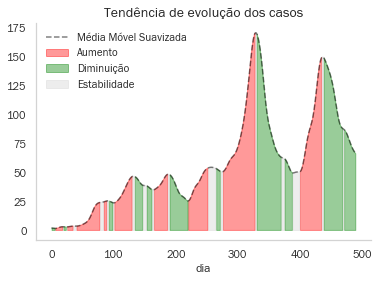

In [16]:
# cria vetor bool de aumento simples.
def create_aumetos(array):
    array_bool = []
    for i in range (len(array)):
        if (i == 0):
            array_bool.append(False)
        else:
            if(array[i] > array[i-1]):
                array_bool.append(True)
            else:
                array_bool.append(False)
            
    return array_bool

# cria vetor bool de aumento ou diminuição de acordo com um tresh.
def create_aumentORdim2(tipo, array, tresh):
    array_bool = []
    for i in range (len(array)):
        if (i == 0):
            array_bool.append(False)
        else:
            if (tipo == "aumento"):
                if(array[i] > (1 + tresh)*array[i-1]):
                    array_bool.append(True)
                else:
                    array_bool.append(False)
            if (tipo == "diminuição"):
                if(array[i] < (1 - tresh)*array[i-1]):
                    array_bool.append(True)
                else:
                    array_bool.append(False)
    
    return array_bool

# deve ter o mesmo tresh
def create_cinza(array, tresh):
    array_bool = []
    for i in range (len(array)):
        if (array[i] < (1 + tresh)*array[i-1] and array[i] > (1 - tresh)*array[i-1]):
            array_bool.append(True)
        else:
            array_bool.append(False)
            
    return array_bool
            
    
    
# suavização
def movavg(Y,n):   
    k = Y.size
    Y_smooth = np.zeros(k)
    
    Y_edge = np.concatenate( ( Y[0]*np.ones(n) , Y , Y[ k-n : k] + Y[k-1] - Y[k-n-1] )  )
    
    for i in range (0,k):
        Y_smooth[i]  =  np.sum(Y_edge[i:i+2*n+1])/(2*n+1)
        
    return Y_smooth

def smooth(Y,n,j):   
    k = Y.size

    R_smooth = np.zeros(k)
    
    R_smooth = movavg(Y,n)
    for i in range (0,j):
        R_smooth = movavg(R_smooth,3)
        
    return R_smooth

def transform_array_not(array):
    inverse_array = []
    for i in range (len(array)):
        inverse_array.append(not(array[i]))
    
    return inverse_array

# não da certo suavizar n_vezes porque desloca
# melhor jeito é fazer uma media movel de outro jeito mais suavizada e depois passar o tresh
 
dia = np.arange(len(mv))

mv_smooth = smooth(mv, 3, 4)

aumentos_bool = create_aumentORdim2("aumento", mv_smooth, 0.005)
diminuicao_bool = create_aumentORdim2("diminuição", mv_smooth, 0.005)
cinza_bool = create_cinza(mv_smooth, 0.005)
  
# plot
#plt.figure(figsize=(8,4))
plt.title("Tendência de evolução dos casos", size = 14)
plt.xlabel("dia", fontsize = 12)

plt.plot(dia, mv_smooth, linestyle='--', alpha = 0.5, color='black', label = "Média Móvel Suavizada")
plt.fill_between(dia, 0, mv_smooth, where = aumentos_bool, color ="red", alpha = 0.4, label = "Aumento")
plt.fill_between(dia, 0, mv_smooth, where = diminuicao_bool, color ="green", alpha = 0.4, label = "Diminuição")
plt.fill_between(dia, 0, mv_smooth, where = cinza_bool, color ="lightgray", alpha = 0.4, label = "Estabilidade")
plt.grid(False)
plt.legend(fontsize=11, frameon=False)

print(f"média móvel suavizada hoje: {mv_smooth[-1]}")

plt.savefig('tendencia_casos.png',bbox_inches='tight', dpi = 200)

inicio restrição: 2021-02-12 00:00:00
início lockdown 2.0: 2021-02-21 00:00:00
término lockdown 2.0: 2021-02-27 00:00:00


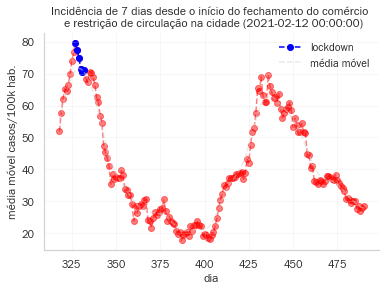

In [17]:
r = 2.38
mask = dia > 317 # dia 318 é dia 12fev - decreto lockdown
data = df["data"][318]

mask2 = (dia > 326) & (dia < 333) # dia 327 é dia 21fev - lockdown 2.0

print("inicio restrição:", df["data"][318])
print("início lockdown 2.0:", df["data"][327])
print("término lockdown 2.0:", df["data"][333])

plt.plot(dia[mask], mv[mask]/r, "o", ls = "--", color = 'red', alpha = 0.5)
plt.plot(dia[mask2], mv[mask2]/r, "o", ls = "--", color = 'blue', alpha = 1, label = "lockdown")
plt.plot(dia[mask], mv_smooth[mask]/r, ls = "--", color = "lightgray", alpha= 0.5, label = "média móvel")

plt.grid(color = "lightgray", alpha = 0.2)
plt.title(f"Incidência de 7 dias desde o início do fechamento do comércio \n e restrição de circulação na cidade ({data})")
plt.ylabel("média móvel casos/100k hab.")
plt.xlabel("dia")
plt.legend(frameon = False)

plt.savefig('mv_lockdown.png',bbox_inches='tight', dpi = 300)

68.14285714285714


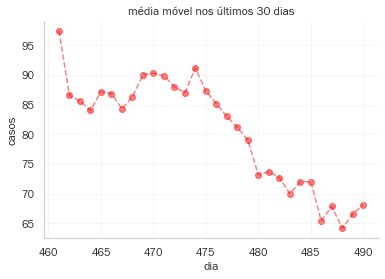

In [18]:
n = 30
mask = dia > pos-n
plt.plot(dia[mask], mv[mask], "o", ls = "--", color = 'red', alpha = 0.5)
#plt.plot(dia[mask], mv_smooth[mask], "o", ls = "--", color = 'blue', alpha = 0.5)
plt.grid(color = "lightgray", alpha = 0.2)
plt.title(f"média móvel nos últimos {n} dias")
plt.ylabel("casos")
plt.xlabel("dia")

print(mv[-1])
plt.savefig('mv_last7days.png',bbox_inches='tight', dpi = 300)

2020-12-31 00:00:00 2021-01-13 00:00:00


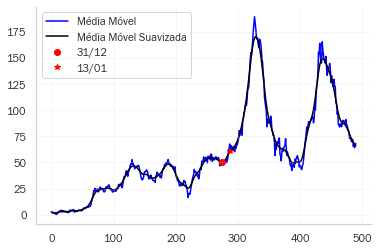

In [19]:
plt.grid(False)
plt.plot(dia, mv,  color='blue', label = "Média Móvel")
plt.plot(dia, mv_smooth, color='black', label = "Média Móvel Suavizada")


plt.plot(dia[275], mv_smooth[275], "o", label = "31/12", color = "red")
plt.plot(dia[288], mv_smooth[288], "*", label = "13/01", color = "red")

print(df["data"][275], df["data"][288])
plt.grid(color = "lightgray", alpha = 0.2)

plt.legend()

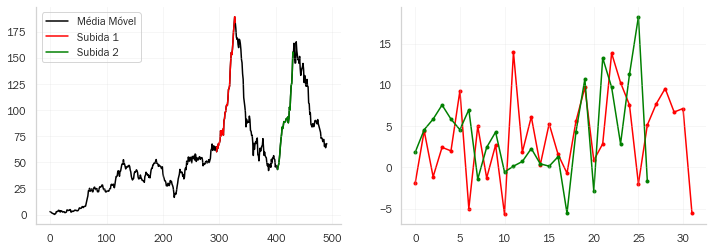

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey = False)

mask = (dia < 329) & (dia > 294)
mask2 = (dia < 432) & (dia > 402)

ax1.plot(dia, mv,  color='black', label = "Média Móvel")

ax1.plot(dia[mask], mv[mask],  color='red', label = "Subida 1")
ax1.plot(dia[mask2], mv[mask2],  color='green', label = "Subida 2")

ax1.grid(color = "lightgray", alpha = 0.2)
ax1.legend()


var_1 = variacao(mv[mask])
var_2 = variacao(mv[mask2])

x_1 = np.arange(len(var_1)-2)
x_2 = np.arange(len(var_2)-2)

ax2.plot(x_1, var_1[2:],".", ls = "-",  color='red', label = "Subida 1" )
ax2.plot(x_2, var_2[2:], ".", ls = "-",   color='green', label = "Subida 2" )
ax2.grid(color = "lightgray", alpha = 0.2)


## 3. Acumulados

In [21]:
casos_week, end_week = agroup_week(df, variacao(df["confirmados"]) )
casos_month = agroup_month(df, dias_meses, variacao(df["confirmados"]) )

mortes_week, end_week = agroup_week(df, variacao(df["mortes"]) )
mortes_month = agroup_month(df, dias_meses,  variacao(df["mortes"]) )


491 491


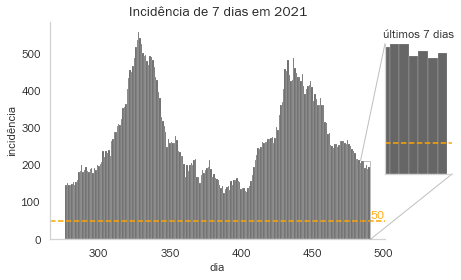

In [22]:
#### ARRUMAR: PLOT NÃO TA INDO ATÉ O DIA ATUAL ###

# incidencia de 7 dias
novos = variacao(df["confirmados"])[0:pos+1]

# obter a soma nos 7 dias anteriores ao n-ésimo dia
def sieben_tag_incidenz(novos):
    aux_array = []
    for i, v in enumerate(novos):
        if (i == 0):
            aux = novos[0]
        elif (i < 7):
            aux = novos[0:i].sum()
        else:
            aux = novos[i-7:i].sum()
        
        aux_array.append(aux/r)
    
    return np.array(aux_array)


# plot
fig, ax = plt.subplots(figsize=[6, 4])

incidencia = sieben_tag_incidenz(novos)
x = np.arange(len(incidencia))
print(len(incidencia), len(x))

# 1° jan = 276
mask = x > 276

ax.bar(x[mask], incidencia[mask], linewidth = 0.3, alpha = 0.6, width = 1, color = "black")
ax.set_title('Incidência de 7 dias em 2021', size='14')
ax.set_xlabel('dia', fontsize=12)
ax.set_ylabel("incidência")
ax.grid(False)

# plot horizontal
ax.axhline(50, ls = "--", color ="orange")
plt.text(pos+1, 55, "50", size = 12, color = "orange")

# inset axes....
axins = ax.inset_axes([1, .3, .2, .6])
axins.bar(x[mask], incidencia[mask], linewidth = 0.3, alpha = 0.6, width = 1, color = "black")

# sub region of the original image
x1, x2, y1, y2 = pos+1-7, pos+1, 0, max(incidencia[pos+1-7:])
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_title("últimos 7 dias")
axins.grid(False)
axins.axhline(50, ls = "--", color ="orange")

ax.indicate_inset_zoom(axins)

plt.savefig('7tagincidenz.png',bbox_inches='tight', dpi = 150)


Novos casos esta semana: 173.0


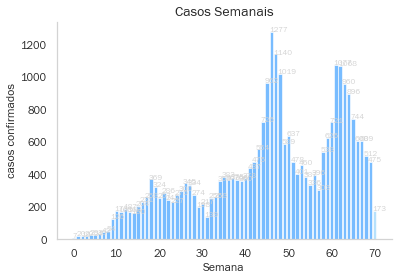

In [23]:
semana_atual = len(casos_week)
#fazendo as cores
colors = make_colors(semana_atual, "dodgerblue", "lightskyblue")

#txt
for i, v in enumerate(casos_week):
    if (v==0 or i >= semana_atual ):
        break
    else:
        if (v>100):
            plt.text(i-0.55, casos_week[i]+1, int(casos_week[i]),fontsize=8, color= 'lightgrey')
        else:
            plt.text(i-0.35, casos_week[i]+1, int(casos_week[i]),fontsize=8, color= 'lightgrey')
            
#plot
x = np.arange(len(casos_week))
y = casos_week
plt.bar(x, y, alpha=0.6, color=colors)

plt.title('Casos Semanais' , size='14')
plt.xlabel('Semana', fontsize=12)
plt.ylabel("casos confirmados")
plt.grid(False)
        
print("Novos casos esta semana:", casos_week[-1])

plt.savefig('casos_semanais.png',bbox_inches='tight', dpi = 150)

In [24]:
y[38:42]

[366.0, 360.0, 378.0, 437.0]

casos esse mês: 173.0


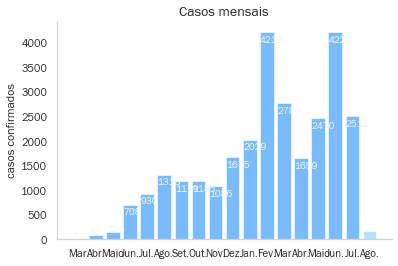

In [25]:
mes_atual = len(mortes_month)
plt.figure(figsize=(6,4))

# fazendo cores 
colors = make_colors(mes_atual, "dodgerblue", "lightskyblue")
colors2 = make_colors(mes_atual, "whitesmoke", "white")

# plot
x = np.arange(len(casos_month))
y = []
for i in range (len(meses)):
    y.append(int(casos_month[i]))

plt.xticks(x, meses)
plt.bar(x, y, alpha=0.6, color=colors)
plt.title("Casos mensais", size = 14)
plt.ylabel("casos confirmados", size = 12)
plt.grid(False)

# txt
for i, v in enumerate(y):
    if (v==0):
        break
    elif (v<700):
        plt.text(i-.35, 
              y[i]+2, 
              v, 
              fontsize=10, 
              color= colors2[i])
    else:
        plt.text(i-.39, 
                  y[i]-210, 
                  v, 
                  fontsize=10, 
                  color= colors2[i])
        
print("casos esse mês:", casos_month[-1])
        
plt.savefig('casos_mensais.png',bbox_inches='tight', dpi = 150)


Numero de mortes nesta semana:  0.0


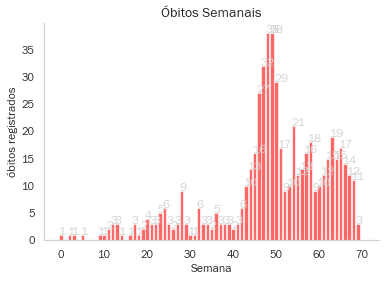

In [26]:
semana_atual = len(mortes_week)

#fazendo as cores
colors = make_colors(semana_atual, "red", "mistyrose")


#txt
for i, v in enumerate(mortes_week):
    if (v == 0):
        pass
    else:
        plt.text(i-0.5, mortes_week[i], int(mortes_week[i]),fontsize=12, color= 'lightgrey')
            
#plot
x = np.arange(len(mortes_week))
y = mortes_week
plt.bar(x, y, alpha=0.6, color=colors)

plt.title('Óbitos Semanais', size='14')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('óbitos registrados', fontsize=12)
plt.grid(False)
        
print("Numero de mortes nesta semana: ", mortes_week[-1])

plt.savefig('obitos_semanais.png',bbox_inches='tight', dpi = 150)

Numero de mortes neste mês:  0.0


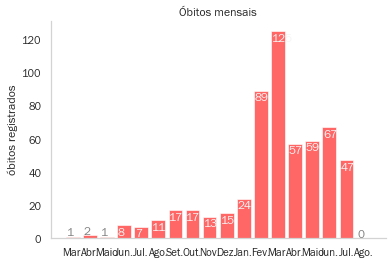

In [27]:
#fazendo as cores
colors = make_colors(mes_atual, "red", "mistyrose")
colors2 = make_colors(mes_atual, "whitesmoke", "gray")
        
# plot
x = np.arange(len(mortes_month))
y = []
for i in range (len(meses)):
    y.append(int(mortes_month[i]))


# txt
for i, v in enumerate(y):
    if (v < 5):
        plt.text(i-.36, 
                  y[i]+.6, 
                  y[i], 
                  fontsize=12, 
                  color= "gray")    
    else:
        plt.text(i-.36, 
                  y[i]-6, 
                  y[i], 
                  fontsize=12, 
                  color= colors2[i])

plt.title("Óbitos mensais")
plt.ylabel('óbitos registrados', fontsize=12)
plt.xticks(x, meses)
plt.bar(x, y, alpha=0.6, color=colors)
plt.grid(False)

print("Numero de mortes neste mês: ", mortes_month[-1])

plt.savefig('obitos_mensais.png',bbox_inches='tight', dpi = 150)

## 4. Internações

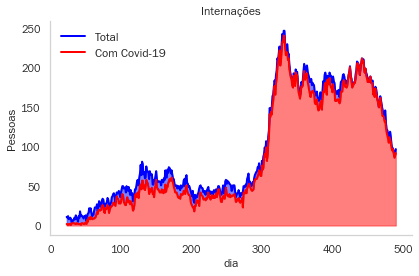

In [28]:
#plt.figure(figsize=(8,5))

plt.plot(df['dia'], df['total internações'],  linestyle='-',linewidth = 2, color='blue', label='Total')
plt.plot(df['dia'], df['internações confirmadas'],  linestyle='-',linewidth = 2, color='red', label='Com Covid-19' )

plt.fill_between(df['dia'], df['total internações'], df['internações confirmadas'], color='blue', alpha=0.5)
plt.fill_between(df['dia'],df['internações confirmadas'], color = "red", alpha=0.5 )

plt.title('Internações')

plt.xlabel('dia')
plt.ylabel("Pessoas")
plt.legend(fontsize=12, frameon=False)
plt.tight_layout()

plt.grid(False)

plt.savefig('internacoes.png',bbox_inches='tight', dpi = 150)

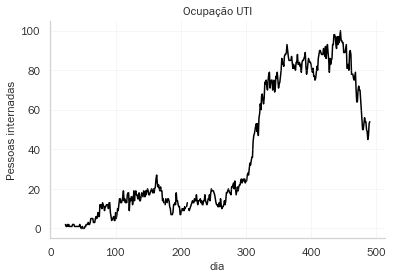

In [29]:
plt.grid(alpha = 0.2, color ="lightgray")

plt.title("Ocupação UTI")
plt.xlabel("dia")
plt.ylabel("Pessoas internadas")

plt.plot(df['dia'], df['UTI (total)'], ls = "-", color = "black")
#plt.fill_between(df['dia'], df['UTI (total)'], color = "black", alpha=0.5 )

plt.savefig('internacoes_UTI.png',bbox_inches='tight', dpi = 150)

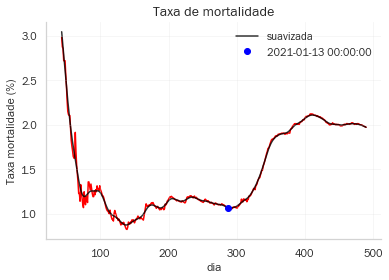

In [30]:
mortalidade_index = []
mortalidade_index = 100*df['mortes'][:pos+1]/df['confirmados'][:pos+1]
mask =  mortalidade_index < 3

dia = np.arange(len(mortalidade_index))
mortalidade_index_smooth = smooth(mortalidade_index, 3, 4) 

plt.plot(dia[mask], mortalidade_index[mask], color = 'red')
plt.plot(dia[mask], mortalidade_index_smooth[mask], color = "black", alpha = 0.8, label = "suavizada")
plt.plot(288, mortalidade_index[288], "o", label = df["data"][288], color = "blue" )

plt.legend(frameon = False)
plt.title("Taxa de mortalidade", size = 14)
plt.grid(alpha=0.2, color='lightgrey')
plt.xlabel('dia', fontsize=12)
plt.ylabel('Taxa mortalidade (%)', fontsize=12)

plt.savefig('taxa_mortalidade.png',bbox_inches='tight', dpi = 150)

distância temporal entre os picos: 18


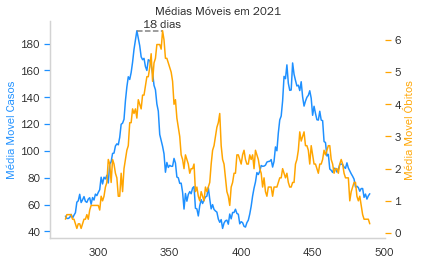

In [31]:
mask = dia > 276

#ax
fig, ax = plt.subplots()
ax.plot(dia[mask], mv[mask], color = "dodgerblue")
ax.grid(False)
ax.tick_params(color = "dodgerblue")

#ax2
ax2 = ax.twinx()
ax2.plot(dia[mask], mv_mortes[mask], color = "orange")
ax2.grid(False)
ax2.tick_params(color = "orange")

ax.set_ylabel('Média Movel Casos', fontsize=12, color = "dodgerblue")
ax2.set_ylabel('Média Movel Óbitos', fontsize=12, color = "orange")
plt.title("Médias Móveis em 2021")

def deltat_peak(array1, array2):
    date1, date2 = np.argmax(array1), np.argmax(array2)
    
    return date1, date2, date2-date1

d1, d2, deltat_picos = deltat_peak(mv, mv_mortes)

#line
max_mv = max(mv)
y = [max_mv, max_mv]
x = [d1, d2]

ax.plot(x, y, 'm--', color = "grey")
ax.text(x[0]+4, max_mv+2, "18 dias" )

print("distância temporal entre os picos:",deltat_picos)

plt.savefig("picos.png", dpi = 150)

## 5. Vacinação

In [42]:
dia_ini_dados = 385
mask = df["dia"] >= dia_ini_dados

pop_aqa = 238000
heard_tresh = 0.8
im_coletiva = heard_tresh*238000
pop_elegivel = (1-0.1485)*pop_aqa # pop aprox < 12 anos

vac_1dose = df["1a dose"]
vac_2dose = df["2a dose"] + df["dose unica"]

dados_vac_atuais = [[pop_aqa],
            [im_coletiva],
            [vac_1dose[pos]],
            [vac_2dose[pos]]]

vac_1dose_diaria = variacao(vac_1dose)
vac_2dose_diaria = variacao(vac_2dose)

vac_diaria = vac_2dose_diaria + vac_1dose_diaria
pct_vac_diaria = 100*vac_diaria/pop_aqa
vacAcum7dias = vac_diaria[pos-6:pos+1].sum()

pct_pop_1dose = round(100*vac_1dose[pos]/pop_aqa, 1)
pct_pop_2dose = round(100*vac_2dose[pos]/pop_aqa, 1)

In [43]:
# ajuste linear dos ultimos 7 dias.
def eq_reta(x, A, B):
    y = A*x + B
    
    return y

def eq_reta_inv(y, A, B):
    x = (y - B)/A
    
    return x

# pega os valores de vacinados totais e retorna y da curva de previsão e data.
def make_previsao(array_dia, array_vac, span, treshs, pop_aqa):
    
    # pegando os últimos 7 dias 
    arr_vac_last7 = array_vac[pos-6:pos+1]
    arr_dia_last7 = np.arange(pos-6,pos+1)
    
    # fit
    fit, mcov1 = curve_fit(eq_reta, arr_dia_last7, arr_vac_last7)
    
    x = np.arange(pos-7, pos+span, 1)
    y = eq_reta(x, fit[0], fit[1])
    
    # que dia que vamos atingir?
    datas_im_col = []
    for trash in treshs:
        dia_im_col = eq_reta_inv(trash*pop_aqa, fit[0], fit[1])
        data_im_col = date.today() + timedelta(days=dia_im_col-pos)
        
        datas_im_col.append(data_im_col)
    
    return x, y, datas_im_col

def make_previsao2(array_dia, array_vac, n, tresh, pop_aqa):
    """
    Para cada um dos n dias anteriores, faz um ajuste dos útlimos 7 dias
    e retorna vetor com as n datas em que a vacinação atingirá um dado tresh.
    """
    datas = []
    
    dias = np.arange(pos-(n-1), pos+1)
    print("dias analisados:", dias)
 
    for dia in dias:
        
        # pegando os últimos 7 dias 
        arr_vac_last7 = array_vac[dia-6:dia+1]
        arr_dia_last7 = np.arange(dia-6,dia+1)
        
        # fit
        fit, mcov1 = curve_fit(eq_reta, arr_dia_last7, arr_vac_last7)
        
        # retorna a data que vai atingir o tresh
        data = eq_reta_inv(tresh*pop_aqa, fit[0], fit[1])
                
        datas.append(data)
        
    return datas
    

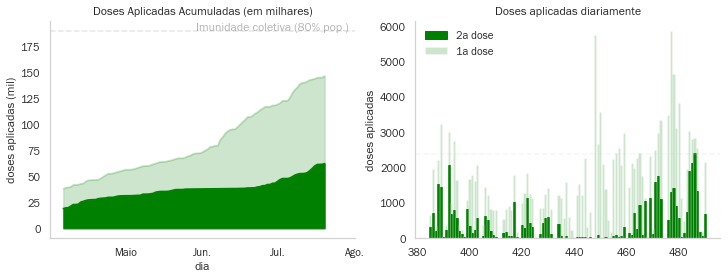

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey = False)

# plot 1
x = df["dia"]
ax1.plot(x[mask], vac_1dose[mask]/1e3,ls = "-", alpha = 0.2,color = "green")
ax1.plot(x[mask], vac_2dose[mask]/1e3, ls = "-", alpha = 1,color = "green")

ax1.fill_between(x[mask], vac_2dose[mask]/1e3, vac_1dose[mask]/1e3, alpha = 0.2, color = "green")
ax1.fill_between(x[mask], 0, vac_2dose[mask]/1e3, alpha = 1, color = "green")

ax1.axhline(im_coletiva/1e3, ls = "--", color = "grey", alpha = 0.2)
dia_txt = 384 + 5/7*(pos - 414)
ax1.text(dia_txt,im_coletiva/1e3,"Imunidade coletiva ("+str(int(100*heard_tresh))+"% pop.)",color="grey",alpha = 0.6)

ax1.grid(False)

ax1.set_xlabel("dia")
ax1.set_ylabel("doses aplicadas (mil)")
ax1.set_title("Doses Aplicadas Acumuladas (em milhares)")

# como colocar os meses em xticks se ax.set_xticks() não funciona (só plt.xticks())
meses1, dias_meses1, linhas1, pos_ticks1 = make_month_arrays(data_atual, True)
n_mes = int(data_atual[3:5])
ax1.set_xticks(pos_ticks1[13:13+n_mes-4])
ax1.set_xticklabels(meses1[14:14+n_mes-3])
#linhas_veticais(linhas1[13:], 7) modificar p aceitar ax

# plot 2
total_mask = vac_2dose_diaria[mask] + vac_1dose_diaria[mask]
ax2.bar(x[mask], vac_2dose_diaria[mask], alpha = 1, color = "green", edgecolor = "green", label = "2a dose")
ax2.bar(x[mask], total_mask, alpha = 0.2, color = "green", label = "1a dose")

ax2.set_ylabel("doses aplicadas")
ax2.set_title("Doses aplicadas diariamente")
ax2.grid(False)

ax2.legend(frameon = False)

ax2.axhline(pop_aqa/100, ls = "--", alpha = 0.2, color = "lightgray")


# Mensagem
plt.savefig("vacinacao.png", dpi = 150)

Taxa média de vacinação: 0.35%


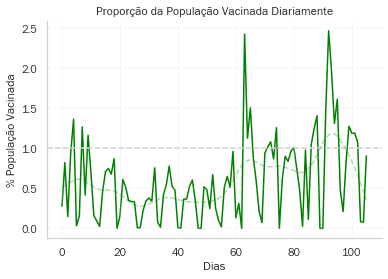

In [45]:
# fazer: quantos % da pop são vacinados diariamente
y = pct_vac_diaria[dia_ini_dados: pos+1]
x = np.arange(len(pct_vac_diaria[dia_ini_dados: pos+1]))

plt.plot(x, y, color = "green")
plt.grid(alpha = .2, color = "lightgrey")

plt.axhline(1, ls ="--", color = "lightgrey")

y_smooth = smooth(y, 3, 2)

plt.plot(x, y_smooth, color = "green", alpha = 0.3, ls = "--")

plt.title("Proporção da População Vacinada Diariamente")
plt.xlabel("Dias")
plt.ylabel("% População Vacinada")

print(f"Taxa média de vacinação: {round(y_smooth[-1],2)}%")

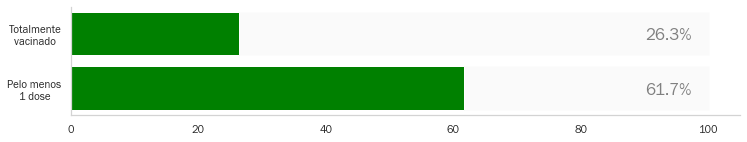

In [46]:
fig, ax = plt.subplots(figsize=(12,2))

x, y = ["Pelo menos\n1 dose    ", "Totalmente\nvacinado  "], [pct_pop_1dose, pct_pop_2dose]
y2 = [100, 100]

ax.barh(x, y2, color = "lightgrey", alpha = 0.1)
ax.barh(x, y, color = "green")

x_txt = 90
ax.text(x_txt, -.1, str(pct_pop_1dose)+"%", size = 17, color = "grey")
ax.text(x_txt, .9, str(pct_pop_2dose)+"%", size = 17, color = "grey")

ax.grid(False)

plt.savefig("vac_estagio.png", dpi = 150)

Datas: [datetime.date(2021, 5, 7), datetime.date(2021, 6, 17), datetime.date(2021, 7, 27), datetime.date(2021, 9, 5), datetime.date(2022, 1, 4)]
26% da população de Araraquara tem menos de 20 anos.
~14,85% da população de Araraquara tem menos de 12 anos.


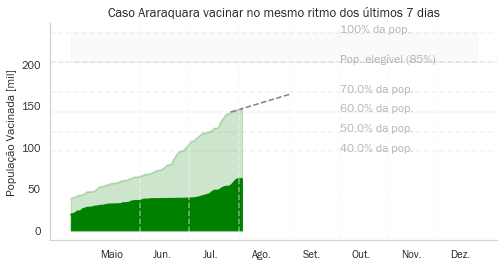

In [47]:
# fazer plot aqui com subplots. Um mostrando o fit de perto e outro de longe
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharey = False)

# ax2
x = df["dia"]
ax.plot(x[mask], vac_1dose[mask]/1e3,ls = "-", alpha = 0.2,color = "green")
ax.plot(x[mask], vac_2dose[mask]/1e3, ls = "-", alpha = 1,color = "green")

ax.fill_between(x[mask], vac_2dose[mask]/1e3, vac_1dose[mask]/1e3, alpha = 0.2, color = "green")
ax.fill_between(x[mask], 0, vac_2dose[mask]/1e3, alpha = 1, color = "green")

treshs = [0.4, 0.5, 0.6, 0.7, 1]
x1, y1, datas_im_col = make_previsao(x, np.array(vac_1dose), 30, treshs, pop_aqa)
print("Datas:", datas_im_col)
ax.plot(x1, y1/1e3, ls = "--", color = "grey")
ax.set_title("Caso Araraquara vacinar no mesmo ritmo dos últimos 7 dias", size = 13)
ax.grid(False)

#linhas horizontais
dia_txt = 550
for tresh in treshs:
    ax.axhline(tresh*pop_aqa/1e3, ls = "--", color = "grey", alpha = 0.1)
    ax.text(dia_txt, tresh*pop_aqa/1e3, str(tresh*100)+"% da pop.", color = "grey", alpha = 0.6)
    
pop_elegivel

ax.axhline(pop_elegivel/1e3, ls = "--", color = "grey", alpha = 0.2)
ax.text(dia_txt, pop_elegivel/1e3, "Pop. elegível ("+str(int(pop_elegivel/pop_aqa*100))+"%)", color = "grey", alpha = 0.6)
ax.fill_between(np.arange(dia_ini_dados,dia_ini_dados+250), pop_aqa/1e3, pop_elegivel/1e3, alpha = 0.1, color = "lightgrey")


# colocando meses em x
meses1, dias_meses1, linhas1, pos_ticks1 = make_month_arrays(data_atual, True)

plt.xticks(pos_ticks1[13:], meses1[14:])
linhas_veticais(linhas1[13:], 7)

ax.set_ylabel("População Vacinada [mil]")

plt.savefig("Projecao.png", dpi = 150)

print("26% da população de Araraquara tem menos de 20 anos.")
print("~14,85% da população de Araraquara tem menos de 12 anos.")

dias analisados: [465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490]
resultado: [524.5532904235062, 517.506019947238, 523.1077040567322, 538.617193236775, 553.4264093678897, 587.5093815544034, 614.5418733561116, 611.6127998214823, 563.1641531040711, 553.4169886113525, 561.5375648158135, 545.5218813756703, 524.7691880237427, 512.5781172295804, 506.63871515858307, 501.49350408298886, 501.22670097111353, 506.17102730358897, 514.7649277856149, 524.018566876474, 535.3917729958742, 554.3746981080226, 554.6271189901842, 559.9943484879077, 581.6422748023505, 584.3273649923107]


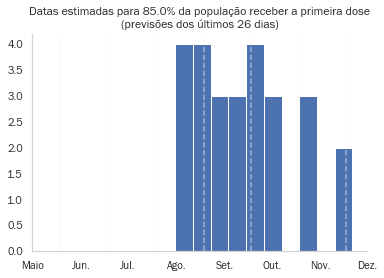

In [48]:
n = 26
tresh = 0.85
datas = make_previsao2(x, np.array(vac_1dose), n, tresh, pop_aqa)
print("resultado:",datas)

plt.hist(datas)

plt.xticks(pos_ticks1[13:], meses1[14:])
linhas_veticais(linhas1[13:], 7)

plt.grid(False)

plt.title(f"Datas estimadas para {100*tresh}% da população receber a primeira dose\n(previsões dos últimos {n} dias)")
plt.savefig("prev-vac.png", dpi = 150)

![imagem](PIRAMIDE.jpg)

# Mensagem

In [39]:
def mensagem(aumentos_bool, diminuicao_bool):
    text2 = "."
    if (aumentos_bool[-1]):
        text = "Acelerada"
    elif(diminuicao_bool[-1]):
        text = "Desacelerada"
    else:
        text = "Estável"
        text2 = " "
        if (mv[-1] > 60):
            text2 = " em um patamar alto."
        elif (mv[-1] < 20):
            text2 = " em um patamar baixo."
        else:
            text2 = " em um patamar médio."
            
    
    body = "Tendência dos novos casos: "
    
    return body + text + text2

def mensagem2(casos_weekn, sabado):
    # se é sabado (não era pra ser dia 6 ou 7?)
    if (dia_sem == 5):
        i = -2
        diff_pct = (casos_week[i]-casos_week[i-1])*100/casos_week[i-1]
        if ( diff_pct > 0):
            text2 = " ("+str(round(diff_pct,2))+"% maior que a semana passsada) "
        else:
            text2 = " ("+str(abs(round(diff_pct,2)))+"% menor que a semana passsada) "
    else:
        i = -1
        text2 = " "
    
    text = "Esta semana: " + str(int(casos_week[i])) + str(" casos")
        
    return text + text2
    
    
def Mensagem3(vac_diaria):
    
    vacAcum7dias = vac_diaria[pos-6:pos+1].sum()
    vacAcum7dias_lastweek = vac_diaria[pos-6-7:pos+1-7].sum()
        
    txt1 = f"Foram aplicadas {int(vacAcum7dias)} doses nos útlimos 7 dias"
    
    if (dia_sem == 5):
        diff_pct = round((vacAcum7dias-vacAcum7dias_lastweek)*100/vacAcum7dias_lastweek, 2)
        if (vacAcum7dias > vacAcum7dias_lastweek):
            txt2 = f", {diff_pct}% a mais que semana passada"
        else:
            txt2 = f", {diff_pct}% a menos que semana passada"
    else:
        txt2 = "."
    return txt1 + txt2
            

print("dia semana:", dia_sem)
print(mensagem(aumentos_bool, diminuicao_bool))
print("Média móvel:", round(mv[-1], 1) ,"casos")
print(mensagem2(casos_week, end_week))
print(Mensagem3(vac_diaria))

dia semana: 1
Tendência dos novos casos: Desacelerada.
Média móvel: 68.1 casos
Esta semana: 173 casos 
Foram aplicadas 12791 doses nos útlimos 7 dias.


# PDF

In [40]:
from fpdf import FPDF

WIDTH = 210
HEIGHT = 297

data_atual2 = date.today().strftime("%m-%d-%Y")

    
def create_infos(day, pdf):
    pdf.ln(28)
    pdf.set_font('courier', '', 13)
    #pdf.set_text_color(r: int = 255, g: int = 255, b: int = 255)
    pdf.set_text_color(255, 255, 255)
    pdf.write(4, f'Atualizado em {day}')
    
    pdf.ln(15)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('arial', '', 14)
    pdf.write(4, f'{mensagem(aumentos_bool, diminuicao_bool)}')
    pdf.ln(7)
    pdf.write(4, f'{mensagem2(casos_week, end_week)}')
    pdf.ln(7)
    pdf.write(4, f"Média móvel: {round(mv[-1], 1)} casos")

    
def create_analytics_report(day=data_atual, filename="Report_"+substitui(data_atual2, "/", "-")+".pdf"):
    pdf = FPDF() # A4 (210 by 297 mm)
     
    # primeira página
    pdf.add_page()
    pdf.image("heading_emailpessoal.png", 0, 0, WIDTH)
    
    create_infos(day, pdf)
    
    pdf.image("tabela.png", 5, 80, WIDTH-20)
    pdf.image("casos_diarios.png", 18, 160, WIDTH-50)
    
    # segunda página
    pdf.add_page()
    
    pdf.ln(10)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('arial', '', 22)
    pdf.write(5, f'Visão Geral')
    
    pdf.image("casos_obitos_acumulados2.png", 5, 20+20, WIDTH/2-10)
    pdf.image("casos_obitos_log_acumulados.png", WIDTH/2, 20+20, WIDTH/2-10)
    
    pdf.image("casos_semanais.png", 5, 110+5, WIDTH/2-10)
    pdf.image("obitos_semanais.png", WIDTH/2, 110+5, WIDTH/2-10)
    
    pdf.image("casos_mensais.png", 5, 200, WIDTH/2-10)
    pdf.image("obitos_mensais.png", WIDTH/2, 200, WIDTH/2-10)
     
    # terceira página
    pdf.add_page()
    d = 20
    pdf.ln(10)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('arial', '', 22)
    pdf.write(5, f'Internações e Análise')
    
    pdf.image("internacoes.png", 5, 20+d, WIDTH/2-5)
    pdf.image("internacoes_UTI.png", WIDTH/2, 20+d, WIDTH/2-10)
    
    pdf.image("tendencia_casos.png", 5, 110+10, WIDTH/2-10)
    pdf.image("7tagincidenz.png", WIDTH/2-5, 110+10, WIDTH/2+5)
    
    pdf.image("picos.png", 5, 200, WIDTH/2)
    pdf.image("taxa_mortalidade.png", WIDTH/2+5, 203, WIDTH/2-10)
    
    # quinta pagina
    pdf.add_page()
    pdf.ln(10)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('arial', '', 22)
    pdf.write(5, f'Vacinação')
    pdf.ln(10)
    
    pdf.ln(2)
    pdf.set_text_color(169, 169, 169)
    pdf.set_font('arial', '', 12)
    pdf.write(5, f'{Mensagem3(vac_diaria)}')
    
    pdf.image("vac_estagio.png", 5, 30+15, WIDTH-20)
    
    pdf.image("vacinacao.png", 5, 80+15, WIDTH-20)
    
    pdf.image("projecao.png", 20, 150+15,  WIDTH-50)
    
    # quinta página
    pdf.add_page()
    pdf.ln(10)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('arial', '', 16)
    pdf.write(4, f'Observações:')
    pdf.ln(7)
    pdf.set_font('arial', '', 12)
    pdf.write(4, f'Fonte: Boletins da Prefeitura de Araraquara.')
    pdf.ln(6)
    pdf.write(4, f'Os dias são contados a partir do dia em que foi notificado o primeiro caso confirmado: 31/03.')
    pdf.ln(6)
    pdf.write(4, f'A média móvel é de 7 dias.')
    pdf.ln(6)
    pdf.write(4, f'A semana epidemiológica foi definida de domingo à sábado.')
    pdf.ln(6)
    pdf.write(4, f'Os dados do mundo, Brasil e estado de São Paulo podem ser de ontem.')
    
    print("done!")
    pdf.output(filename, 'F')
    
#GERAR_PDF = True
if (GERAR_PDF):
    tic = time.perf_counter()
    create_analytics_report(data_atual)
    toc = time.perf_counter()
    print(f"PDF compilado em {toc - tic:0.4f} segundos")